# Create Maps of Temperature for a Given Hour by County


In [1]:
# Start by importing the packages we need:
import os
import glob

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable


## Set the Directory Structure

In [2]:
# Identify the data input and output directories:
weather_data_input_dir =  '/Users/burl878/Documents/IMMM/Data/TELL/Production_Runs_V2/tell_data/wrf_tell_counties_output/'
nerc_shapefile_dir =  '/Users/burl878/Documents/Code/code_repos/gdo_climate_toolsuite_visualizations/data/nerc_shapefiles/'
county_shapefile_dir =  '/Users/burl878/Documents/Code/code_repos/gdo_climate_toolsuite_visualizations/data/county_shapefiles/'
image_output_dir =  '/Users/burl878/Documents/Code/code_repos/gdo_climate_toolsuite_visualizations/plots/'


## Make the Plot


In [3]:
def plot_county_temperature_map(time: str, scenario: str, year: str, time_str: str, cmin: int, cmax: int, nerc_shapefile_dir: str, county_shapefile_dir: str, image_output_dir: str, image_resolution: int, save_images=False):
  
    # Read in the county shapefile and reassign the 'FIPS' variable as integers:
    counties_df = gpd.read_file(os.path.join(county_shapefile_dir, r'tl_2020_us_county.shp')).rename(columns={'GEOID': 'FIPS'})
    counties_df['FIPS'] = counties_df['FIPS'].astype(int)

    # Read in the NERC region shapefile and rename the ID variable:
    regions_df = gpd.read_file(os.path.join(nerc_shapefile_dir, 'NERC_Regions_Subregions.shp')).rename(columns={'ID': 'NERC_Region'})
    regions_df['NERC_Region'] = regions_df['NERC_Region'].astype(int)

    # Reproject the shapefiles onto latitute and longitude coordinates:
    counties_df  = counties_df.to_crs({'init': 'EPSG:4269'})
    regions_df  = regions_df.to_crs({'init': 'EPSG:4269'})

    # Read in temperature data for the time given:
    temp_df = pd.read_csv((weather_data_input_dir + scenario + '/' + year + '/' + time + '_UTC_County_Mean_Meteorology.csv'))

    # Convert the temperatures from Kelvin to Fahrenheit:
    temp_df['T2'] = (1.8 * (temp_df['T2'] - 273)) + 32
    
    # Merge the temperature data and county shapefile together using county FIPS codes to join them:
    mapping_df = counties_df.merge(temp_df, on='FIPS', how='left')
    
    # Set the colormap:
    cmap = plt.get_cmap('RdBu_r', 24)
    
    # Make the plot:
    fig, ax = plt.subplots(1, 1, figsize=(25, 10))
    plt.rcParams['font.size'] = 18
    mapping_df.plot(column='T2', ax=ax, edgecolor='gray', linewidth=0.25, cmap=cmap, vmin=cmin, vmax=cmax, legend=True, legend_kwds={'label': 'County-Level Temperature [$^\circ$F]', 'orientation': 'vertical'})
    regions_df.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1.25, zorder=2)
    ax.set_xlim(-126.5, -66);
    ax.set_xlabel('Longitude', fontsize=18); 
    ax.set_ylim(24, 50); 
    ax.set_ylabel('Latitude', fontsize=18);
    ax.set_title(('Temperature: ' + time_str), fontsize=21)
   
    # If the "save_images" flag is set to true then save the plot to a .png file:
    if save_images == True:
       plt.savefig(os.path.join(image_output_dir + 'T_Map_' + time + '.png'), dpi=image_resolution, bbox_inches='tight')
       # plt.close()


/Users/burl878/.pyenv/versions/tell/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


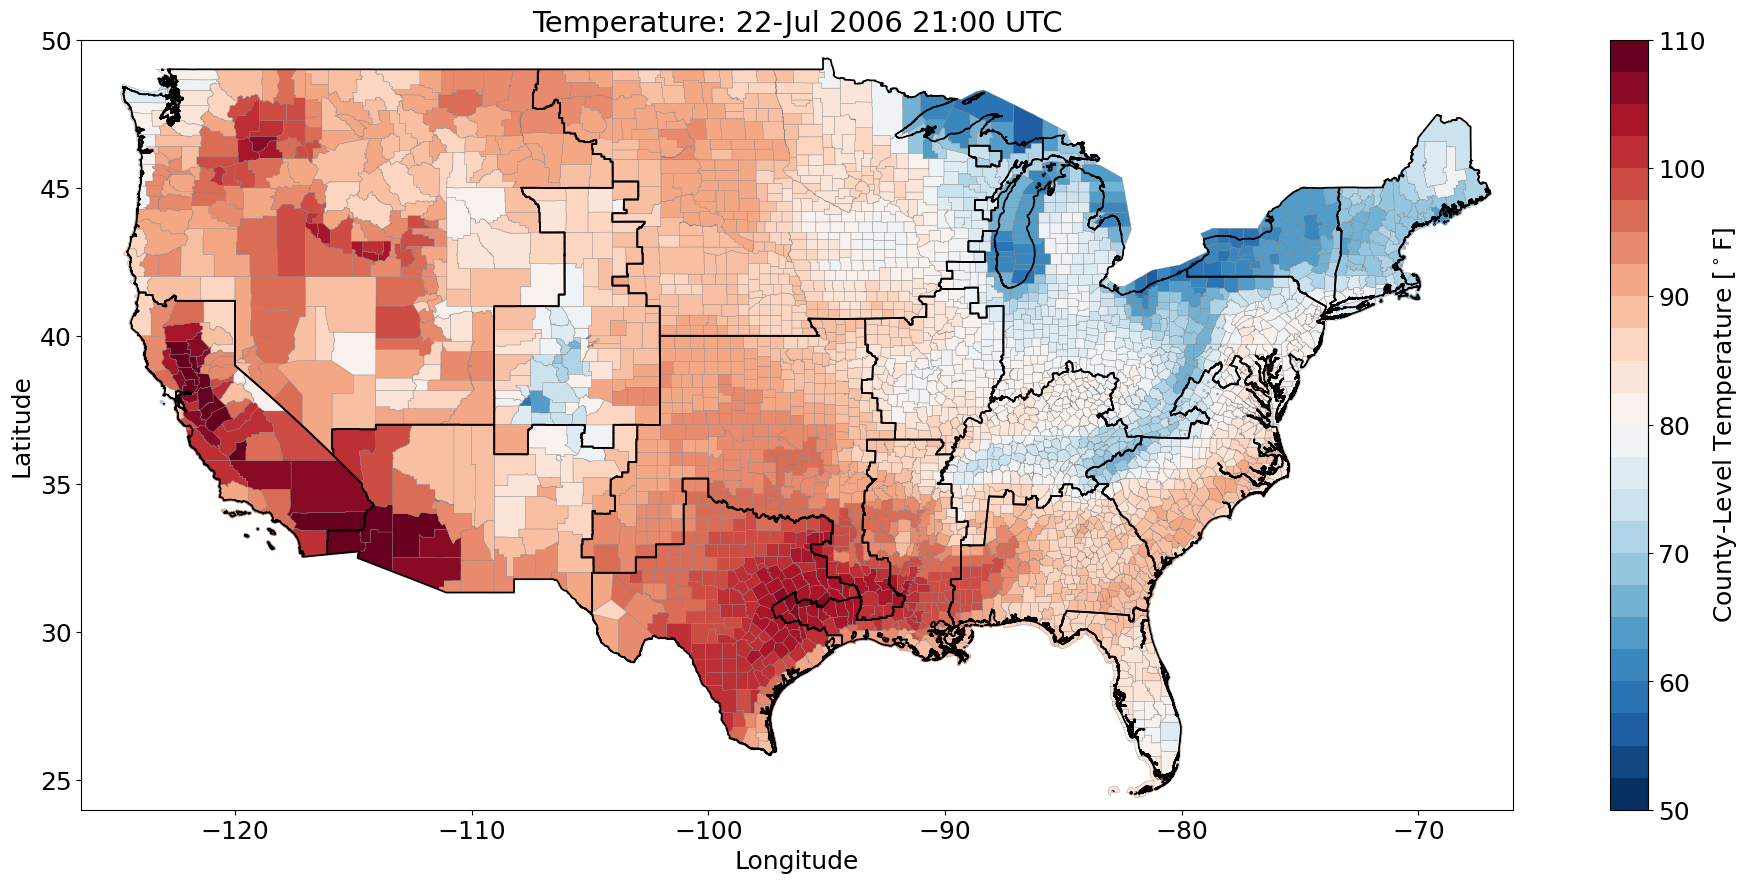

In [6]:
# Make the plot
plot_county_temperature_map(time = '2006_07_22_21',
                            scenario = 'historic',
                            year = '2006',
                            time_str = '22-Jul 2006 21:00 UTC',
                            cmin = 50,
                            cmax = 110,
                            nerc_shapefile_dir = nerc_shapefile_dir, 
                            county_shapefile_dir = county_shapefile_dir,
                            image_output_dir = image_output_dir, 
                            image_resolution = 150, 
                            save_images = True)
